## Dataset/ Topic Name --- "Traffic Violations in USA"

## Title and Author

**Author: Aryasri Meghna Vaishnavi**

**Link to the author's GitHub profile:** **https://github.com/Meghnaaryasri/UMBC-DATA606-Capstone/tree/main**

**Link to the author's LinkedIn profile:** **https://www.linkedin.com/in/meghna-aryasri?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app**

**Link to your PowerPoint presentation file:** **https://umbc-my.sharepoint.com/:p:/g/personal/meghnaa1_umbc_edu/EZwbm7mXg9tAlXmKw2hQfhUB0QcyRRRVLtdeNrIzIO8nHg?e=X3SyKE**


## Background

**What is it about?**

This project focuses on analyzing traffic violations in the United States, tracing back to the first recorded traffic ticket in 1899. It aims to explore the evolution, types, and impact of traffic violations on society and state revenue.

**Why does it matter?**

Understanding traffic violations is crucial for enhancing road safety, shaping public policy, and assessing the financial implications for drivers and state budgets. Analyzing these data can reveal patterns and trends that may inform more effective traffic laws and enforcement strategies.

## Research Questions

**What are the most common types of traffic violations recorded across different states, and how do they vary?**

**How have traffic violation trends changed over the years in the dataset?**

**What factors (e.g., time of day, state laws, driver demographics) contribute most to the likelihood of committing a traffic violation?**

## Data Description:

**The dataset "Traffic_Violations_USA.csv" contains information on traffic violations in the United States, including details such as the date and time of the violation, location, type of violation, driver demographics, and enforcement-related information.**

**Data Source --- Kaggle --- "https://www.kaggle.com/datasets/felix4guti/traffic-violations-in-usa/data"**

## Project Procedure 

## 1. Data Cleaning and Preparation:


**Import necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


**Read the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv("Traffic_Violations.csv")

C:\Users\paspu\AppData\Local\Temp\ipykernel_32244\410699467.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Violations.csv")


In [3]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,12/20/2012,00:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,07/20/2012,23:12:00,MCP,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,...,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,03/19/2012,16:10:00,MCP,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,...,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018634 entries, 0 to 1018633
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1018634 non-null  object 
 1   Time Of Stop             1018634 non-null  object 
 2   Agency                   1018634 non-null  object 
 3   SubAgency                1018634 non-null  object 
 4   Description              1018625 non-null  object 
 5   Location                 1018632 non-null  object 
 6   Latitude                 933599 non-null   float64
 7   Longitude                933599 non-null   float64
 8   Accident                 1018634 non-null  object 
 9   Belts                    1018634 non-null  object 
 10  Personal Injury          1018634 non-null  object 
 11  Property Damage          1018634 non-null  object 
 12  Fatal                    1018634 non-null  object 
 13  Commercial License       1018634 non-null 

In [5]:
df.describe()

,Latitude,Longitude,Year
count,933599.000000,933599.000000,1.012208e+06
mean,39.070965,-77.099552,2.004325e+03
std,1.273985,1.139822,8.457610e+01
min,-94.610988,-77.820825,0.000000e+00
25%,39.031208,-77.195098,2.001000e+03
50%,39.074158,-77.093166,2.005000e+03
75%,39.138796,-77.042386,2.010000e+03
max,40.111822,41.543160,9.999000e+03


In [6]:
df.shape

(1018634, 35)

**Sub-Step 1.1: Handle Missing Values**

In [7]:
# Identify null values in the dataset
null_values_summary = df.isnull().sum()

# Decision on whether to fill in or drop will be based on this summary
null_values_summary


Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                      0
Description                    9
Location                       2
Latitude                   85035
Longitude                  85035
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        6426
Make                          48
Model                        169
Color                      13591
Violation Type                 0
Charge                         0
Article                    52065
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [8]:
# Drop columns with a high number of missing values that aren't crucial
df.drop(['Latitude', 'Longitude', 'Geolocation'], axis=1, inplace=True)

# Fill in missing 'Year' with median value
df['Year'].fillna(df['Year'].median(), inplace=True)

# For categorical columns with fewer missing values, fill with the most common value (mode)
for column in ['Description', 'Location', 'State', 'Make', 'Model','Color', 'Driver City', 'Driver State', 'DL State']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Optionally drop 'Article' if it's not crucial for analysis
df.drop(['Article'], axis=1, inplace=True)

# Check if there are any null values left
df.isnull().sum()


Date Of Stop               0
Time Of Stop               0
Agency                     0
SubAgency                  0
Description                0
Location                   0
Accident                   0
Belts                      0
Personal Injury            0
Property Damage            0
Fatal                      0
Commercial License         0
HAZMAT                     0
Commercial Vehicle         0
Alcohol                    0
Work Zone                  0
State                      0
VehicleType                0
Year                       0
Make                       0
Model                      0
Color                      0
Violation Type             0
Charge                     0
Contributed To Accident    0
Race                       0
Gender                     0
Driver City                0
Driver State               0
DL State                   0
Arrest Type                0
dtype: int64

**Sub-Step - 1.2 - Conversion of data types**

In [9]:
df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Contributed To Accident     object
Race                        object
Gender                      object
Driver City                 object
Driver State        

In [10]:
# Convert date and time to datetime, 'Year' to integer, and various columns to 'category' for optimization
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S').dt.time
df['Year'] = df['Year'].astype(int)  # Assuming 'Year' is provided and relevant
categorical_cols = ['Agency', 'SubAgency', 'Accident', 'Belts', 'Personal Injury', 'Property Damage',
                    'Fatal', 'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol',
                    'Work Zone', 'State', 'VehicleType', 'Make', 'Model', 'Color', 'Violation Type',
                    'Charge', 'Contributed To Accident', 'Race', 'Gender', 'Driver City',
                    'Driver State', 'DL State', 'Arrest Type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify the data type conversion
data_types_after_conversion = df.dtypes

data_types_after_conversion


Date Of Stop               datetime64[ns]
Time Of Stop                       object
Agency                           category
SubAgency                        category
Description                        object
Location                           object
Accident                         category
Belts                            category
Personal Injury                  category
Property Damage                  category
Fatal                            category
Commercial License               category
HAZMAT                           category
Commercial Vehicle               category
Alcohol                          category
Work Zone                        category
State                            category
VehicleType                      category
Year                                int32
Make                             category
Model                            category
Color                            category
Violation Type                   category
Charge                           c

**Sub-Step - 1.3 - Remove Irrelevant Features**

In [11]:
# List of columns to be removed
columns_to_drop = ['Agency', 'SubAgency', 'Description', 'Location']

# Dropping the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Verifying the remaining columns in the DataFrame
print(df.columns)


Index(['Date Of Stop', 'Time Of Stop', 'Accident', 'Belts', 'Personal Injury',
       'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT',
       'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State', 'VehicleType',
       'Year', 'Make', 'Model', 'Color', 'Violation Type', 'Charge',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type'],
      dtype='object')


**Sub-Step - 1.4 - Address Outliers and handle the outliers**

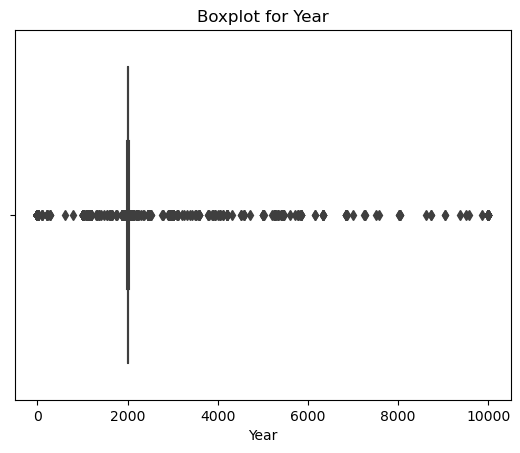

Number of outliers in 'Year': 5386


In [12]:
# For a visual check across 'Year'
sns.boxplot(x=df['Year'])
plt.title('Boxplot for Year')
plt.show()

# For a statistical method to detect outliers across 'Year'
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Year'] < lower_bound) | (df['Year'] > upper_bound)]

# Displaying outliers count
print(f"Number of outliers in 'Year': {outliers.shape[0]}")


In [13]:
# Calculate IQR for 'Year'
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median 'Year'
median_year = df['Year'].median()
df.loc[df['Year'] < lower_bound, 'Year'] = median_year
df.loc[df['Year'] > upper_bound, 'Year'] = median_year

# Verify the changes
print(df['Year'].describe())


count    1.018634e+06
mean     2.005343e+03
std      5.665406e+00
min      1.988000e+03
25%      2.001000e+03
50%      2.005000e+03
75%      2.010000e+03
max      2.023000e+03
Name: Year, dtype: float64


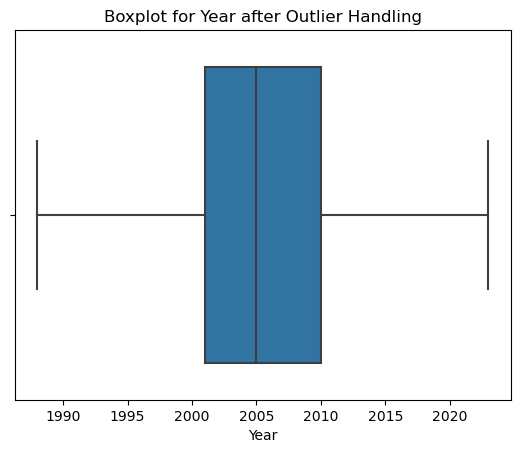

In [14]:
# Using seaborn to create a boxplot to visualize outliers in 'Year'
sns.boxplot(x=df['Year'])
plt.title('Boxplot for Year after Outlier Handling')
plt.show()


**Sub-Step - 1.5 - Encoding**

In [15]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Exclude 'Article' column from high-cardinality columns list
high_cardinality_columns = ['Make', 'Model', 'Charge', 'Driver City']

# Perform label encoding
for col in high_cardinality_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Select columns for OneHotEncoding (low cardinality)
low_cardinality_columns = ['Year', 'Color', 'Violation Type', 'Race', 'Gender', 'DL State', 'Arrest Type']

# Perform OneHotEncoding
df_encoded = pd.get_dummies(df, columns=low_cardinality_columns)
df_encoded.head()


,Date Of Stop,Time Of Stop,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,...,Arrest Type_J - Unmarked Moving Radar (Moving),Arrest Type_K - Aircraft Assist,Arrest Type_L - Motorcycle,Arrest Type_M - Marked (Off-Duty),Arrest Type_N - Unmarked (Off-Duty),Arrest Type_O - Foot Patrol,Arrest Type_P - Mounted Patrol,Arrest Type_Q - Marked Laser,Arrest Type_R - Unmarked Laser,Arrest Type_S - License Plate Recognition
0,2013-09-24,17:11:00,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,2012-12-20,00:41:00,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,2012-07-20,23:12:00,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
3,2012-03-19,16:10:00,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
4,2014-12-01,12:52:00,No,No,No,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


## Step - 2 - EDA

**Sub-Step - 2.1 - Analyize the violation Types**

In [16]:
# Step 2.1: Univariate Analysis on "Violation Type"
# Method: Use value_counts to get the frequency of each violation type
violation_counts = df['Violation Type'].value_counts()

violation_counts


Citation    497615
Warning     468974
ESERO        51123
SERO           922
Name: Violation Type, dtype: int64

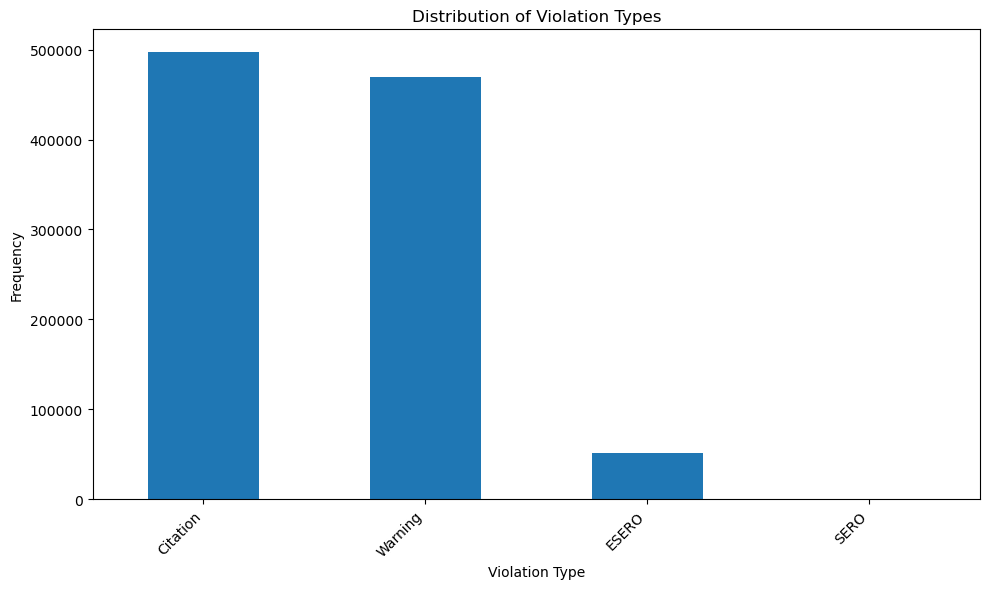

In [17]:
# Visualizing the count of each type of violation using a bar plot
plt.figure(figsize=(10, 6))
violation_counts.plot(kind='bar')
plt.title('Distribution of Violation Types')
plt.xlabel('Violation Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


**Sub-Step - 2.2 - Univariate Analysis**

**Analyze the distribution of the target variable "Violation Type.**

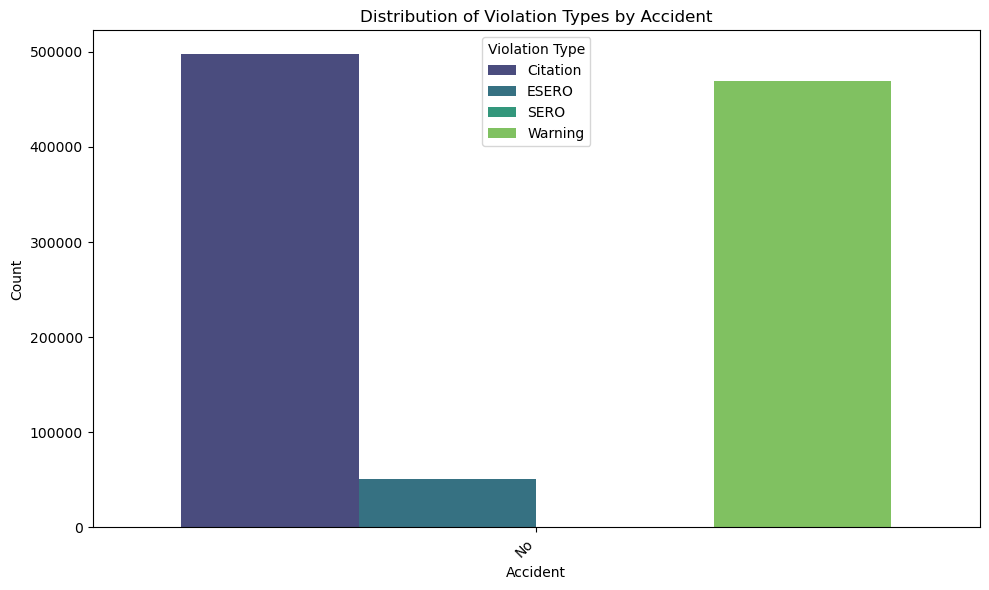

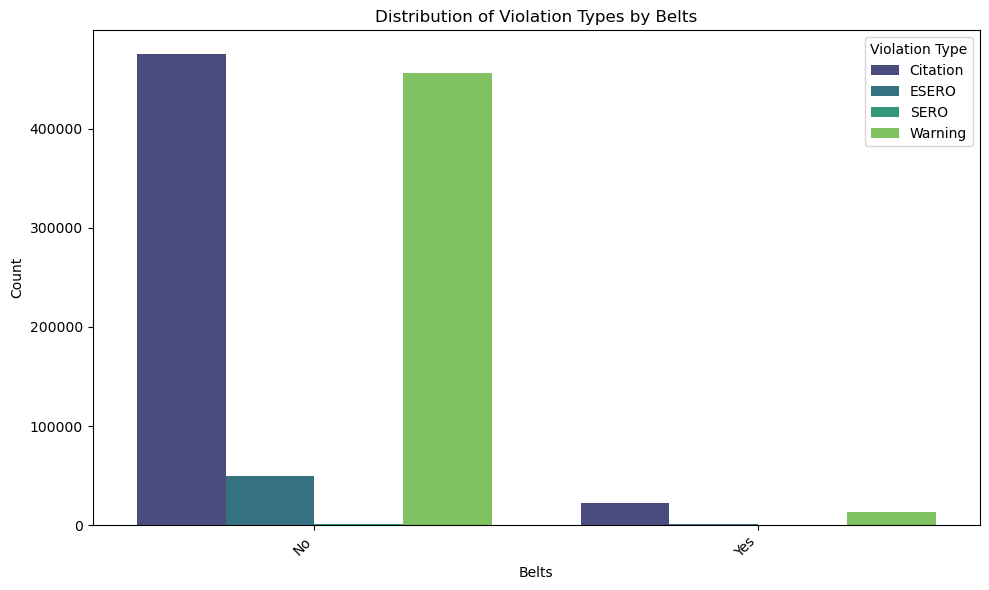

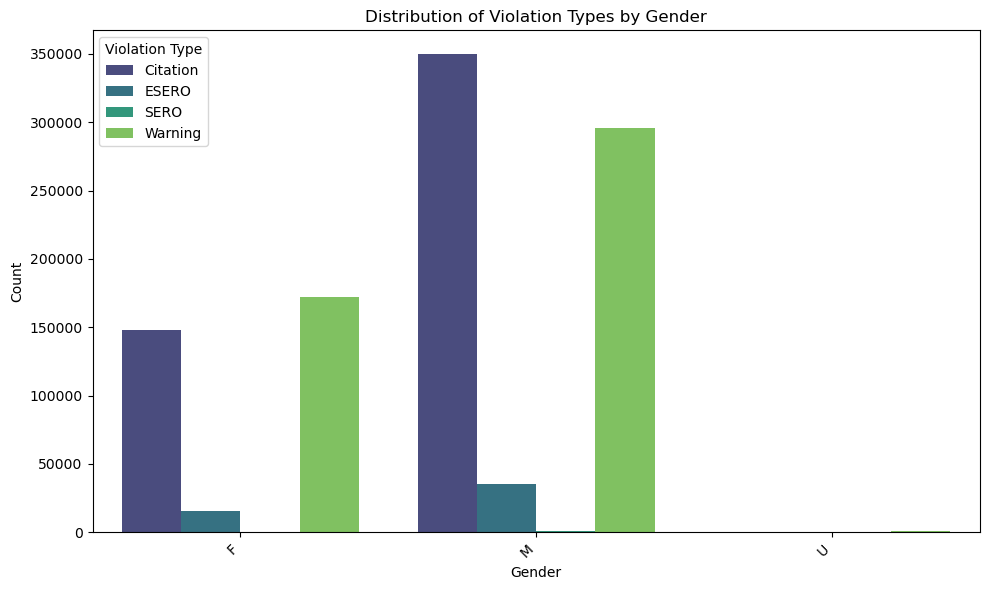

In [18]:
# Step 2.2: Bivariate/Multivariate Analysis
# Categorical Features: Plotting the distribution of violation types within each category
categorical_features = ['Accident', 'Belts', 'Gender']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Violation Type', data=df, palette='viridis')
    plt.title(f'Distribution of Violation Types by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Violation Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




**Box Plots - Violation Type vs Year**

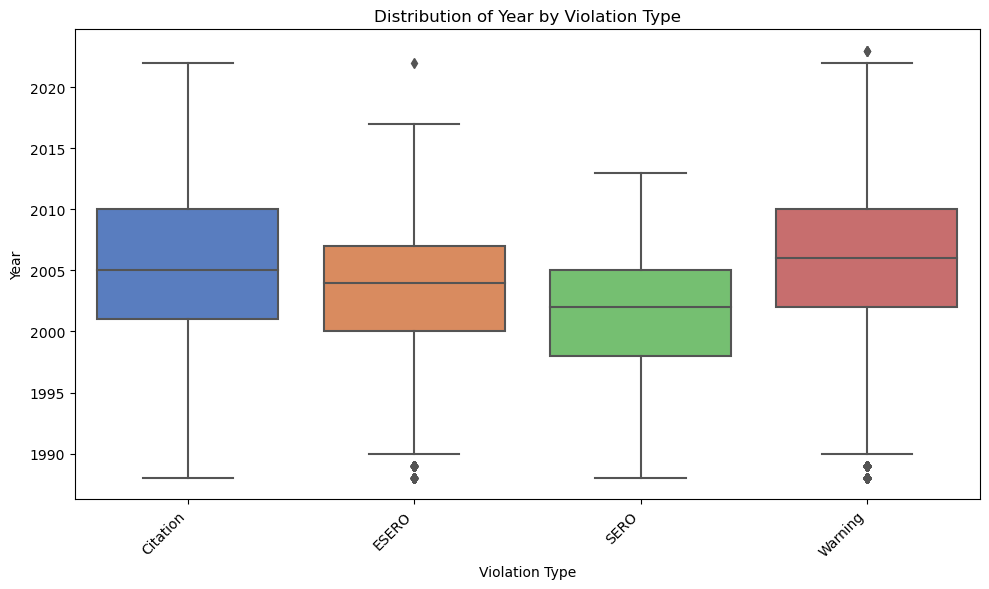

In [19]:
# Numerical Feature: Comparing the distribution of 'Year' across different violation types using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Violation Type', y='Year', data=df, palette='muted')
plt.title('Distribution of Year by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Bar Chart - In year 2013 for each month of violations**

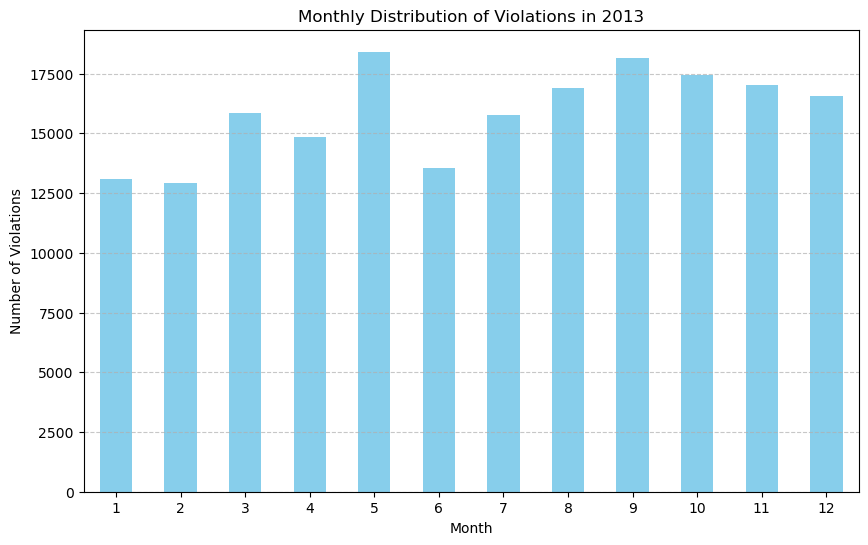

Monthly Distribution of Violations in 2013:
Date Of Stop
1     13098
2     12909
3     15861
4     14842
5     18417
6     13554
7     15748
8     16892
9     18170
10    17448
11    17027
12    16553
Name: Violation Type, dtype: int64


In [20]:
# Convert 'Date Of Stop' to datetime format
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

# Extract the year you're interested in (e.g., 2013)
year_to_analyze = 2013

# Filter the data for the specific year
yearly_data = df[df['Date Of Stop'].dt.year == year_to_analyze]

# Group by month and count violations
monthly_violations = yearly_data.groupby(yearly_data['Date Of Stop'].dt.month)['Violation Type'].count()

# Plotting
plt.figure(figsize=(10, 6))
monthly_violations.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Violations in ' + str(year_to_analyze))
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display numerical output
print("Monthly Distribution of Violations in " + str(year_to_analyze) + ":")
print(monthly_violations)


**Line Plot**

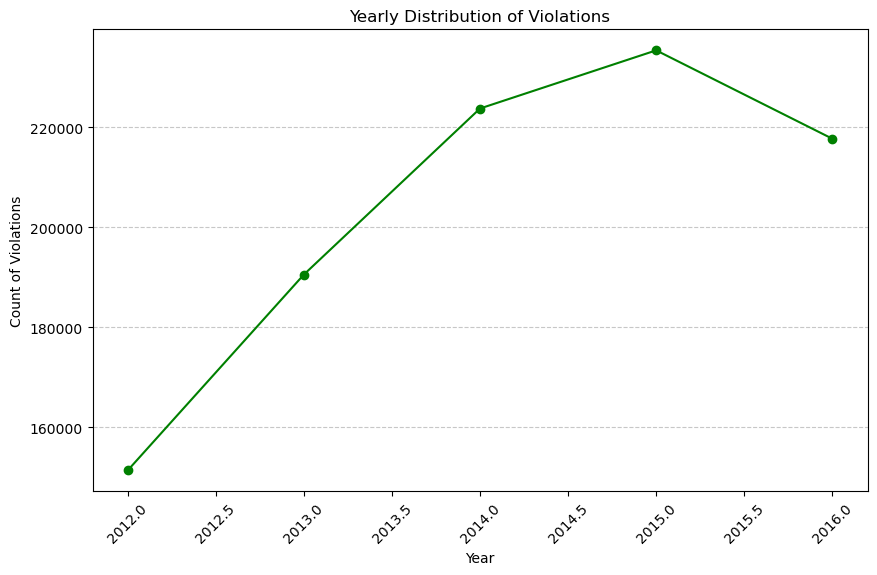

Yearly Distribution of Violations:
Date Of Stop
2012    151365
2013    190519
2014    223721
2015    235349
2016    217680
Name: Violation Type, dtype: int64


In [21]:
# Yearly Distribution of Violations
yearly_violations = df.groupby(df['Date Of Stop'].dt.year)['Violation Type'].count()

# Plotting
plt.figure(figsize=(10, 6))
yearly_violations.plot(kind='line', marker='o', color='green')
plt.title('Yearly Distribution of Violations')
plt.xlabel('Year')
plt.ylabel('Count of Violations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Numerical Output
print("Yearly Distribution of Violations:")
print(yearly_violations)


**Correlation Matrix**

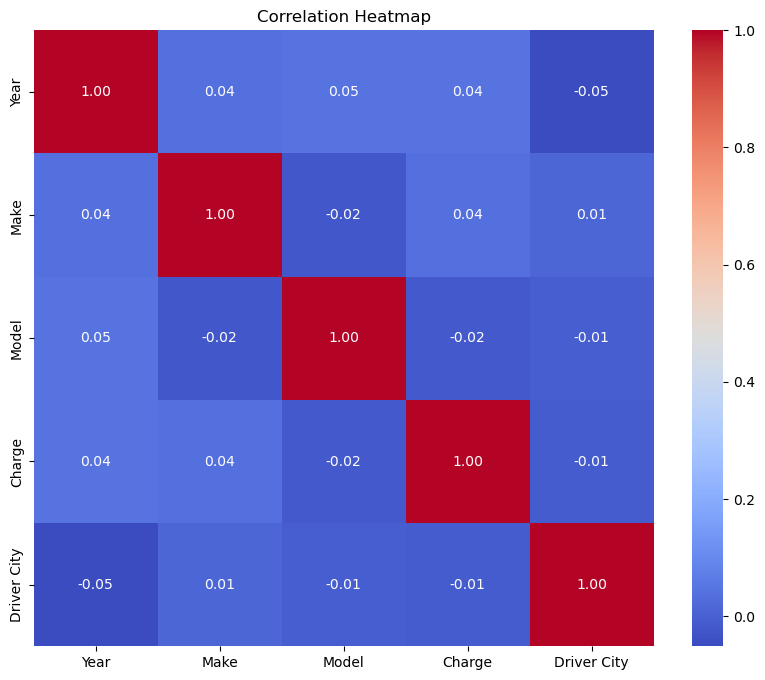

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



**Pair plot - Violation Type vs Year**

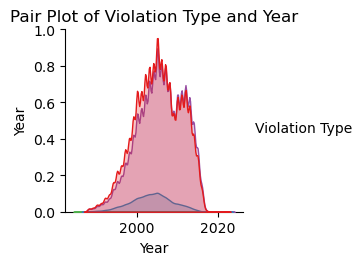

In [23]:
# Selecting the columns for the pair plot
pairplot_data = df[['Violation Type', 'Year']]

# Creating the pair plot
sns.pairplot(pairplot_data, hue='Violation Type', palette='Set1', diag_kind='kde')
plt.title('Pair Plot of Violation Type and Year')
plt.show()


**Sub-Step - 2.2 - feature extraction**

**Converting date and time columns to datetime format, creating a new datetime column, and extracting hour and day of the week information.**

In [24]:
# Convert 'Date Of Stop' to datetime format
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

# Convert 'Time Of Stop' to datetime format
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S').dt.time

# Combine 'Date Of Stop' and 'Time Of Stop' columns to create a new datetime column
df['DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date Of Stop'], row['Time Of Stop']), axis=1)

# Extracting time of day and day of the week from 'DateTime'
df['Hour'] = df['DateTime'].dt.hour
df['Day_of_Week'] = df['DateTime'].dt.day_name()

# Check the first few rows to verify the changes
print(df[['Date Of Stop', 'Time Of Stop', 'DateTime', 'Hour', 'Day_of_Week']].head())


C:\Users\paspu\AppData\Local\Temp\ipykernel_32244\905369666.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['DateTime'] = df.apply(lambda row: pd.datetime.combine(row['Date Of Stop'], row['Time Of Stop']), axis=1)


  Date Of Stop Time Of Stop            DateTime  Hour Day_of_Week
0   2013-09-24     17:11:00 2013-09-24 17:11:00    17     Tuesday
1   2012-12-20     00:41:00 2012-12-20 00:41:00     0    Thursday
2   2012-07-20     23:12:00 2012-07-20 23:12:00    23      Friday
3   2012-03-19     16:10:00 2012-03-19 16:10:00    16      Monday
4   2014-12-01     12:52:00 2014-12-01 12:52:00    12      Monday
